In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from wordcloud import WordCloud

In [3]:
#Import df and check loaded correctly
df = pd.read_csv('final_hateXplain.csv')

# Display the first few rows of the dataset
df.head()

,comment,label,Race,Religion,Gender,Sexual Orientation,Miscellaneous
0,0 u0 lmao wow fuck you too 😂 😂,normal,No_race,Nonreligious,No_gender,No_orientation,NaN
1,1 0 th floor maybe wow cnn with the fakenews t...,offensive,No_race,Nonreligious,No_gender,No_orientation,Other
2,1 0 yrs <number> white women raped by niggers ...,hatespeech,African,Nonreligious,No_gender,No_orientation,NaN
3,1 2 h ago ching chong accepted your friend req...,offensive,Asian,Nonreligious,No_gender,No_orientation,NaN
4,1 8 th century mayhem and lawlessness had noth...,normal,No_race,Nonreligious,No_gender,No_orientation,NaN


In [4]:
# Step 1: Data Cleaning
# Check for missing values and drop them if necessary
print(df.isnull().sum())  # Show the number of NaN values in each column

comment                   0
label                     0
Race                      0
Religion                  0
Gender                    0
Sexual Orientation        0
Miscellaneous         16576
dtype: int64


In [5]:
#Drop NA values
df.dropna(inplace=True)  # Drop rows with missing values

In [6]:
# Ensure the necessary datasets are downloaded
nltk.download('punkt')  # For word_tokenize
nltk.download('stopwords')  # For stopwords

def preprocess_text(text):
    text = text.lower()  # Convert text to lowercase
    text = ''.join([c for c in text if c.isalnum() or c.isspace()])  # Remove special characters
    tokens = word_tokenize(text)  # Tokenize the text
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    return ' '.join(tokens)

# Apply preprocessing to the 'comment' column
df['comment'] = df['comment'].apply(preprocess_text)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/oliverlawrie/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/oliverlawrie/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

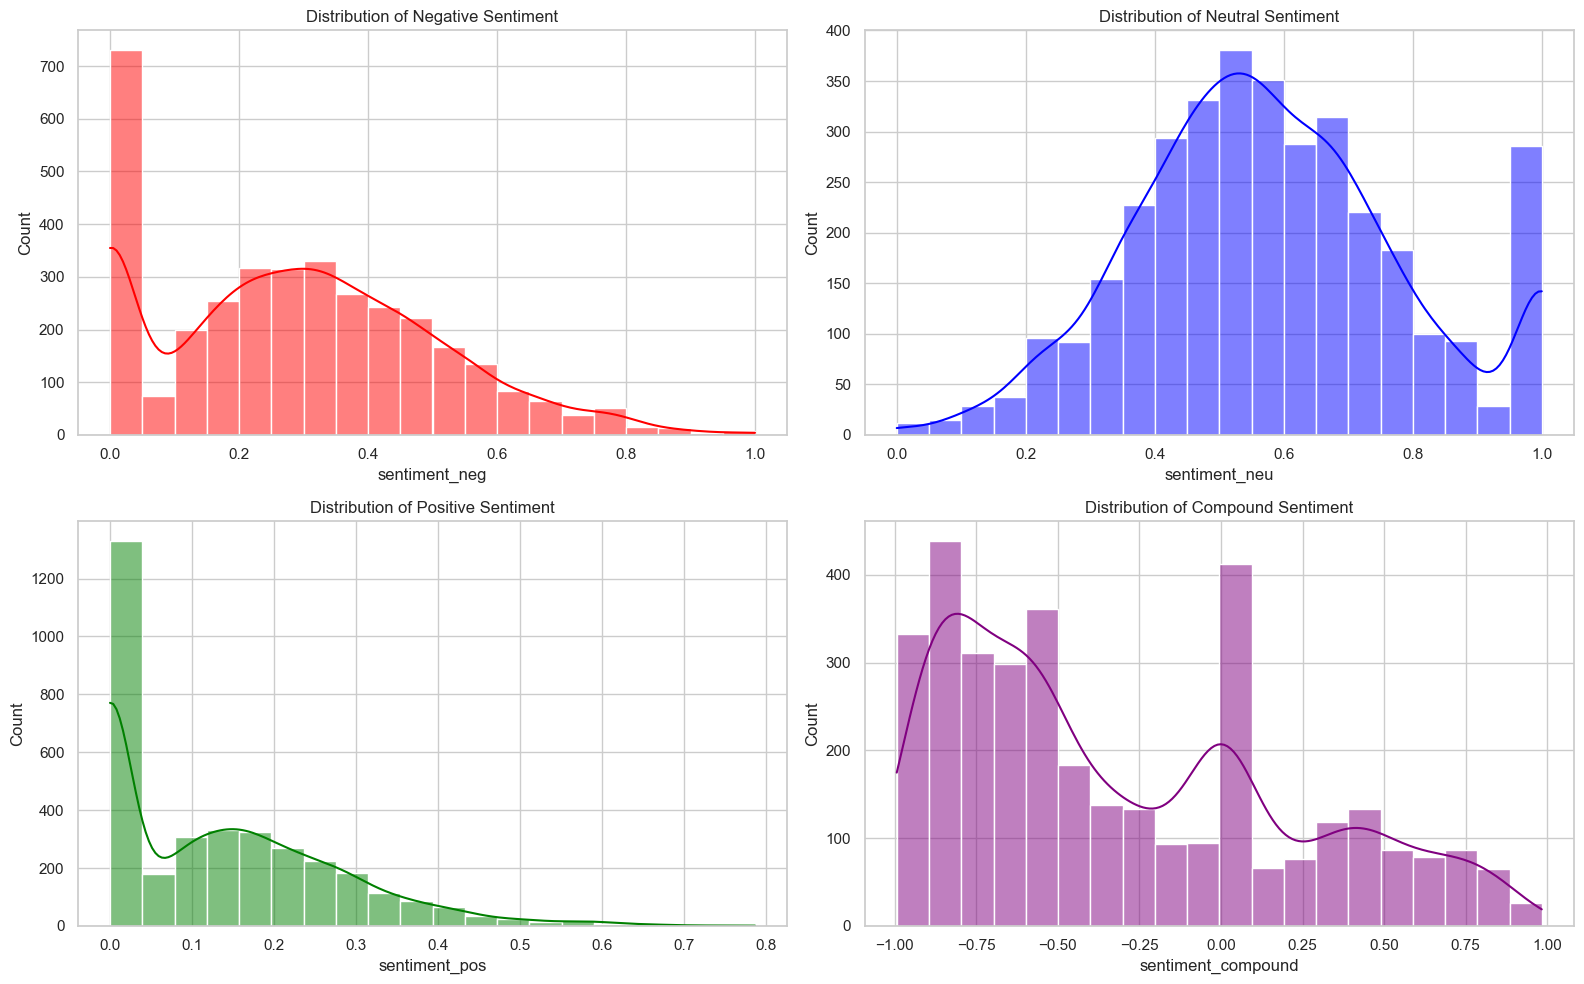

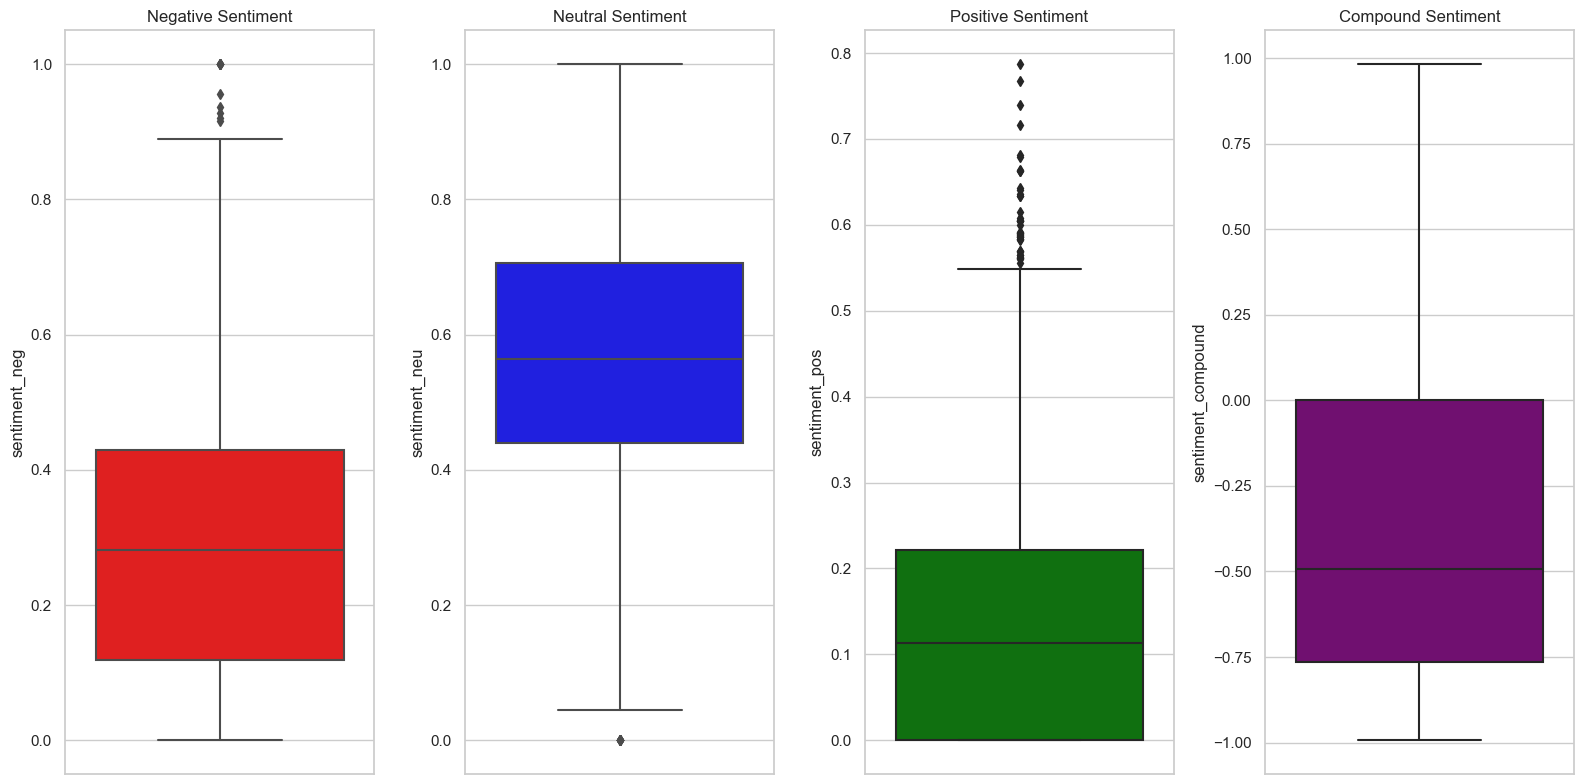

In [7]:
# Step 3: Sentiment Analysis using VADER
sia = SentimentIntensityAnalyzer()

# Function to compute sentiment scores
def get_sentiment(text):
    sentiment = sia.polarity_scores(text)
    return sentiment

# Apply sentiment analysis to each comment and store the results
df['sentiment'] = df['comment'].apply(get_sentiment)

# Extract sentiment components into separate columns
df['sentiment_neg'] = df['sentiment'].apply(lambda x: x['neg'])
df['sentiment_neu'] = df['sentiment'].apply(lambda x: x['neu'])
df['sentiment_pos'] = df['sentiment'].apply(lambda x: x['pos'])
df['sentiment_compound'] = df['sentiment'].apply(lambda x: x['compound'])

# Set the style for the plots
sns.set(style="whitegrid")

# Plot histograms for the sentiment scores
plt.figure(figsize=(16, 10))

# Negative sentiment
plt.subplot(2, 2, 1)
sns.histplot(df['sentiment_neg'], bins=20, color='red', kde=True)
plt.title('Distribution of Negative Sentiment')

# Neutral sentiment
plt.subplot(2, 2, 2)
sns.histplot(df['sentiment_neu'], bins=20, color='blue', kde=True)
plt.title('Distribution of Neutral Sentiment')

# Positive sentiment
plt.subplot(2, 2, 3)
sns.histplot(df['sentiment_pos'], bins=20, color='green', kde=True)
plt.title('Distribution of Positive Sentiment')

# Compound sentiment
plt.subplot(2, 2, 4)
sns.histplot(df['sentiment_compound'], bins=20, color='purple', kde=True)
plt.title('Distribution of Compound Sentiment')

plt.tight_layout()
plt.show()

# Boxplots to visualize sentiment distributions
plt.figure(figsize=(16, 8))

# Boxplot for each sentiment score
plt.subplot(1, 4, 1)
sns.boxplot(y=df['sentiment_neg'], color='red')
plt.title('Negative Sentiment')

plt.subplot(1, 4, 2)
sns.boxplot(y=df['sentiment_neu'], color='blue')
plt.title('Neutral Sentiment')

plt.subplot(1, 4, 3)
sns.boxplot(y=df['sentiment_pos'], color='green')
plt.title('Positive Sentiment')

plt.subplot(1, 4, 4)
sns.boxplot(y=df['sentiment_compound'], color='purple')
plt.title('Compound Sentiment')

plt.tight_layout()
plt.show()

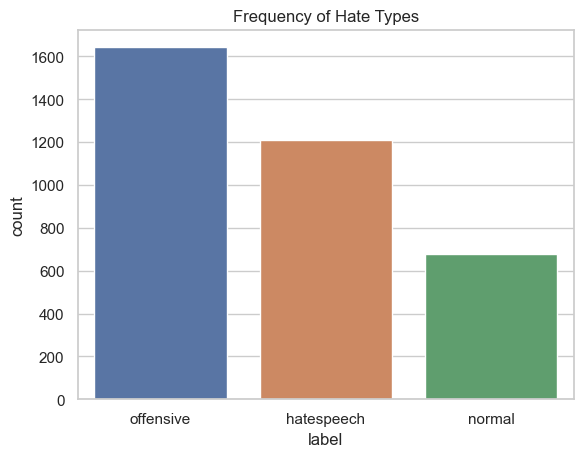

In [8]:
#Visualise word analysis with frequency of each type of hate (from the 'label' column)
sns.countplot(x='label', data=df)
plt.title('Frequency of Hate Types')
plt.show()

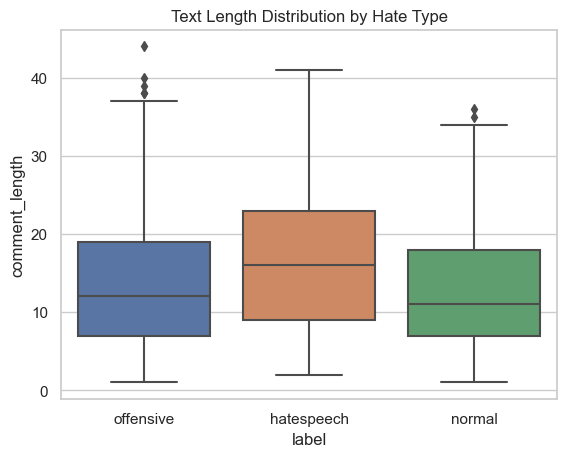

In [9]:
# 4.2 Distribution of text length (number of words) for different hate categories
df['comment_length'] = df['comment'].apply(lambda x: len(x.split()))
sns.boxplot(x='label', y='comment_length', data=df)
plt.title('Text Length Distribution by Hate Type')
plt.show()   

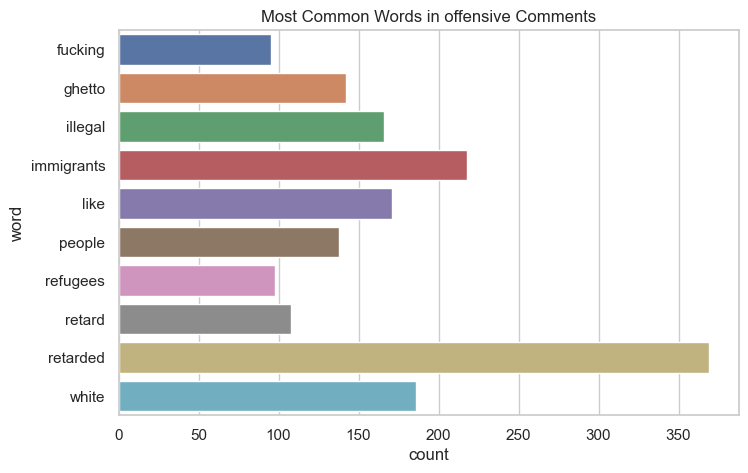

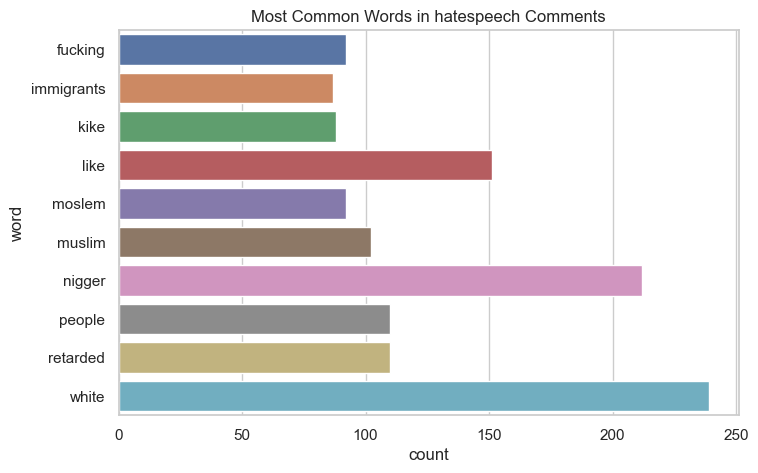

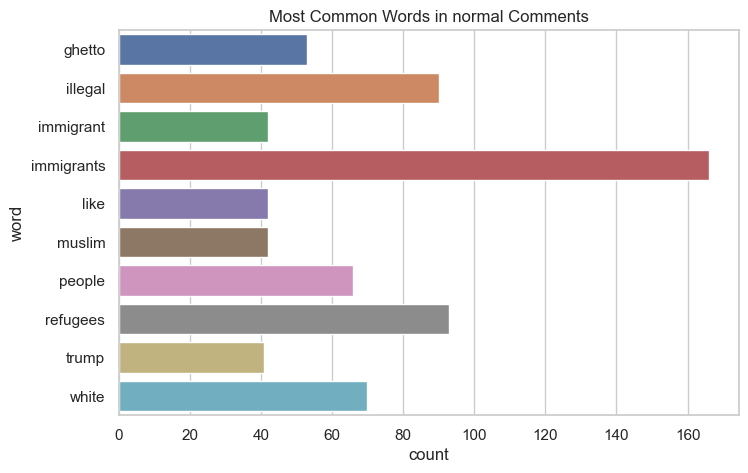

In [10]:
# Find most common words for each hate type
hate_types = df['label'].unique() #get unique entries in label column

# add user and number specifically to stopwords
custom_stop_words = list(ENGLISH_STOP_WORDS.union({'user', 'number'}))  # Convert to list

for hate_type in hate_types: # loop through unique values
    hate_comments = df[df['label'] == hate_type]['comment'] #select row where the label = hate_type being processed and get comment for that hate type
    vectorizer = CountVectorizer(stop_words=custom_stop_words, max_features=10)
    word_count = vectorizer.fit_transform(hate_comments) #fit it into model to create word matrix
    word_freq = np.array(word_count.sum(axis=0)).flatten() #create array with word frequency
    words = vectorizer.get_feature_names_out() #retrieve words linked to features
    
    word_freq_df = pd.DataFrame({'word': words, 'count': word_freq}) #create new df with word data for visualisation
    plt.figure(figsize=(8, 5))
    sns.barplot(x='count', y='word', data=word_freq_df)
    plt.title(f'Most Common Words in {hate_type} Comments')
    plt.show()

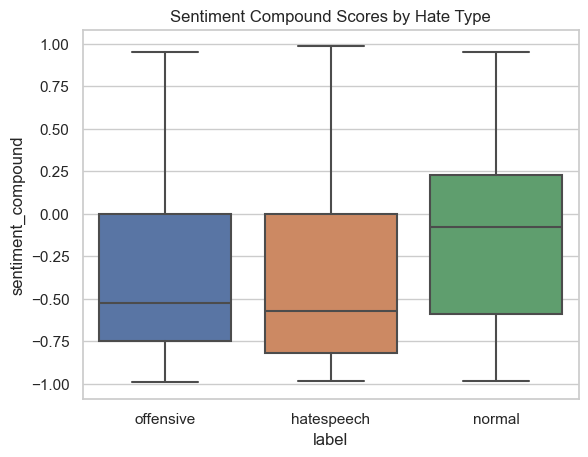

In [11]:
# Do sentiment analysis for each hate category
sns.boxplot(x='label', y='sentiment_compound', data=df)
plt.title('Sentiment Compound Scores by Hate Type')
plt.show()

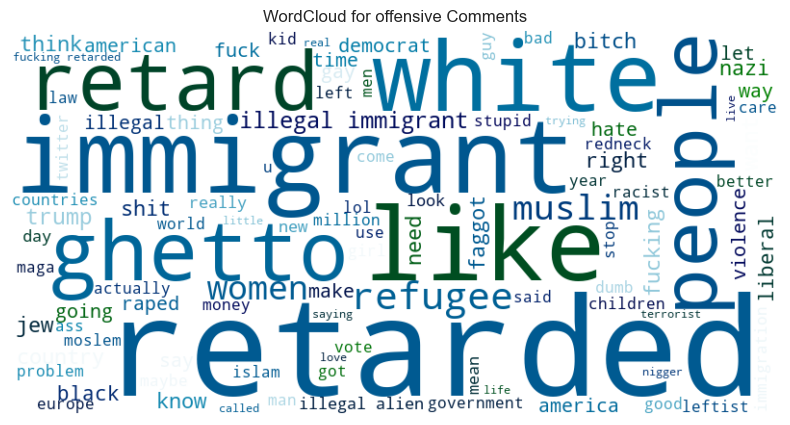

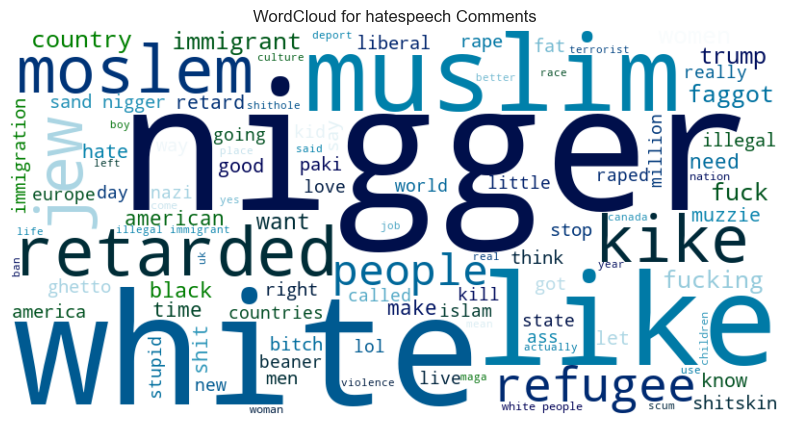

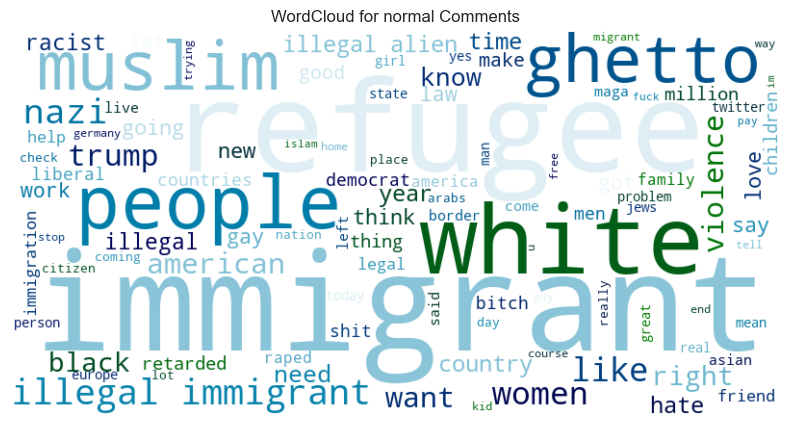

In [12]:
# Loop through each hate type + make word cloud
for hate_type in hate_types:  
    # Filter comments for the current hate type
    hate_comments = df[df['label'] == hate_type]['comment']
    
    # Combine all comments into a single string
    all_text = " ".join(hate_comments)
    
    # Generate the WordCloud with bright and diverse colors
    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          colormap='ocean_r', stopwords=custom_stop_words, 
                          max_words=100, contour_color='steelblue', contour_width=2).generate(all_text)
    
    # Display the WordCloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Hide axes
    plt.title(f'WordCloud for {hate_type} Comments')
    plt.show()